In [22]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import igl
import numpy as np
import scipy as sp
from meshplot import plot, subplot, interact
from scipy.sparse.linalg import spsolve
import meshplot
import os
import math
import meshzoo

In [29]:
def tubeGen(L,R):
    points, cells= meshzoo.tube(length = L, radius = R, n = 100)

    v = points

    f1_id = []
    f2_id = []

    color = []


    for i in range(len(v)):
        if v[i][2] > 0.95:
            color += [2]
            f1_id += [i]
        else:
            if v[i][2] < -0.95:
                color += [-2]
                f2_id += [i]
            else:
                color += [0]
    return [v,f1_id,f2_id,points,cells,color]


3000


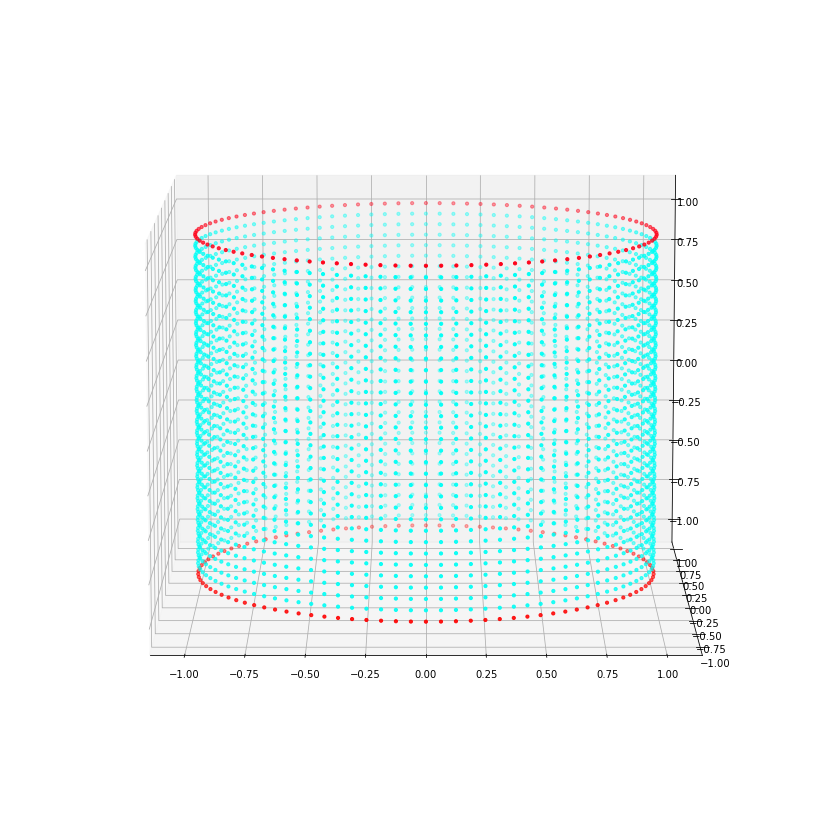

In [30]:
def show(L,R):
    v, f1_id, f2_id, points, cells, color = tubeGen(L,R)
    p = subplot(points, cells, shading={"wireframe": False}, s=[1,4,0])
    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    ax.scatter3D(v[:, 0], v[:, 1], v[:, 2], s = 10 , c=color, cmap='hsv'); #, cmap='hsv' )

    ax.view_init(10,-90)
    freePoint = len(v)-len(f1_id)-len(f2_id)
    print(freePoint)
    plt.show()
show(2,1)

In [31]:
def miniQ(l,v,f1,f2):
    lt = np.transpose(l)
    boundV = []
    boundLt = []
    nonBoundLt = []
    nonBoundL2 = []
    for i in range(v.shape[0]):
        if i in f1 or i in f2:
            boundV.append(v[i])
            boundLt.append(lt[i])
        else:
            nonBoundLt.append(lt[i])

    boundL = np.transpose(boundLt)
    nonBoundL = np.transpose(nonBoundLt)

    for i in range(v.shape[0]):
        if i not in f1 and i not in f2:
            nonBoundL2.append(nonBoundL[i])
    b = -boundL.dot(boundV)
    b2 = []
    for i in range(v.shape[0]):
        if i not in f1 and i not in f2:
            b2.append(b[i])
    x = spsolve(nonBoundL2, b2)
    final = []
    temp = 0
    for i in range(v.shape[0]):
        if i in f1 or i in f2:
            final.append(v[i])
        else:
            final.append(x[temp])
            temp+=1
    return np.asarray(final)

In [35]:
def minimization(L,R):
    v = tubeGen(L,R)[0]
    cells = tubeGen(L,R)[4]
    f1_id = tubeGen(L,R)[1]
    f2_id = tubeGen(L,R)[2]

    vs = [v]
    es = []

    l = -1/8*igl.cotmatrix(vs[0],cells)
    vt = np.transpose(vs[0])
    es.append(vt.dot(l.dot(vs[0])).trace())

    for i in range(100):
        l = -1/8*igl.cotmatrix(vs[i],cells).toarray()

        Q = miniQ(l,vs[i],f1_id,f2_id)
        vs.append(Q)

        # energy 
        vt = np.transpose(vs[i+1])
        if(math.isnan(vt.dot(l.dot(vs[i+1])).trace())): break
        es.append(vt.dot(l.dot(vs[i+1])).trace())
    es=[ i for i in es if not(math.isnan(i)==True)]
    return [vs, cells, es]


c:\Users\User\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
c:\Users\User\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


[[array([[ 1.        ,  0.        , -1.        ],
         [ 1.        ,  0.        , -0.93548387],
         [ 1.        ,  0.        , -0.87096774],
         ...,
         [ 0.99802673, -0.06279052,  0.87096774],
         [ 0.99802673, -0.06279052,  0.93548387],
         [ 0.99802673, -0.06279052,  1.        ]]),
  array([[ 1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
         [ 9.52925201e-01, -3.42820737e-16, -9.35483871e-01],
         [ 9.09816791e-01, -6.72340272e-16, -8.70967742e-01],
         ...,
         [ 9.08021476e-01, -5.71278690e-02,  8.70967742e-01],
         [ 9.51044820e-01, -5.98346684e-02,  9.35483871e-01],
         [ 9.98026728e-01, -6.27905195e-02,  1.00000000e+00]]),
  array([[ 1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
         [ 9.30319080e-01, -2.49527944e-16, -9.42760498e-01],
         [ 8.65747262e-01, -5.05744027e-16, -8.84455666e-01],
         ...,
         [ 8.64038907e-01, -5.43607204e-02,  8.84455666e-01],
         [ 9.28483307e-01, -5.8415

In [45]:
def area(r):
    return math.pi * (r)**2

L=2
x = [1,2,3]

convV = []
convC = []
for i in x:
    vs,cells,es = minimization(L,i)
    es=[ i for i in es if not(math.isnan(i)==True)]
    lastidx = len(es)-1
    convV.append(vs[lastidx])
    convC.append(cells)

In [46]:
p = subplot(convV[0], convC[0], shading={"wireframe": False}, s=[1,4,0])
p = subplot(convV[1], convC[1], shading={"wireframe": False}, s=[1,4,1],data=p)
p = subplot(convV[2], convC[2], shading={"wireframe": False}, s=[1,4,2],data=p)